# Log Transformation

## Mathematical Explanation:
Log transformation applies the logarithm function to each data point. Common bases for logarithms are $ e $ (natural log), 10, or 2. This transformation is particularly effective in reducing the skewness of data and diminishing the influence of extreme values.

Mathematically, if $ x $ is a data point, the log transformation is:
$ y = \log(x) $
where $ \log $ can be natural log, log base 10, etc.

### Implementation in Python:
Let's take an example dataset and apply a log transformation to it.

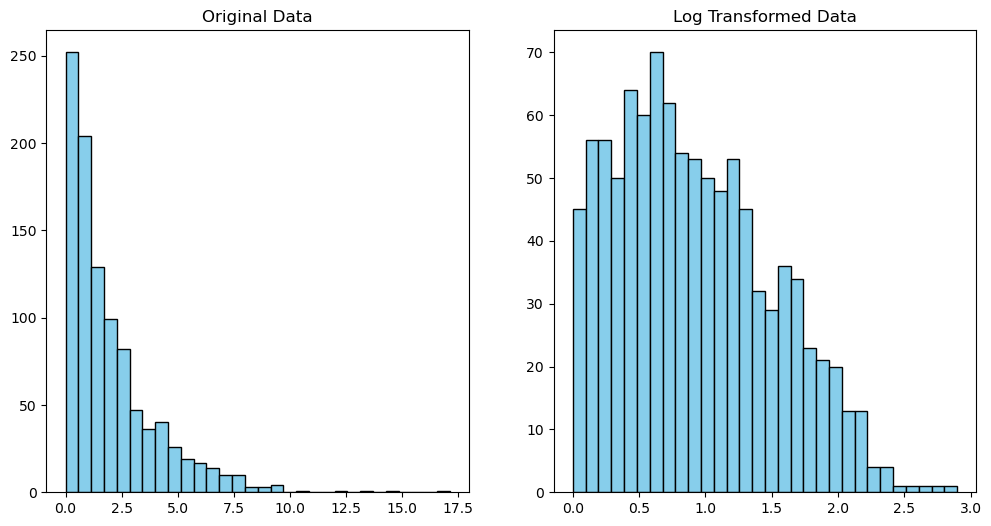

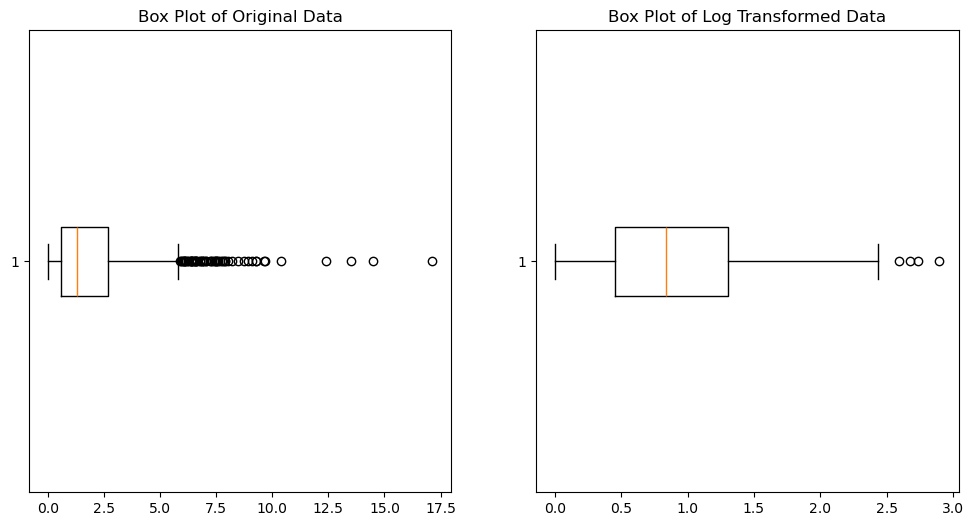

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a skewed dataset
np.random.seed(0)
data = np.random.exponential(scale=2, size=1000)

# Applying log transformation
log_data = np.log(data + 1)  # Adding 1 to avoid log(0)

# Plotting the original and transformed data using histograms
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(data, bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Original Data')
ax[1].hist(log_data, bins=30, color='skyblue', edgecolor='black')
ax[1].set_title('Log Transformed Data')
plt.show()

# Plotting the original and transformed data using box plots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(data, vert=False)
ax[0].set_title('Box Plot of Original Data')
ax[1].boxplot(log_data, vert=False)
ax[1].set_title('Box Plot of Log Transformed Data')
plt.show()


# Square Root or Cube Root Transformation

## Mathematical Explanation:
Square root and cube root transformations are also used to reduce skewness and minimize the impact of outliers. These transformations are less aggressive compared to log transformation.

For square root transformation:
$ y = \sqrt{x} $

For cube root transformation:
$ y = \sqrt[3]{x} $


### Implementation in Python:

Let's take an example dataset and apply a Square Root Cube and Root Transformation transformation to it.

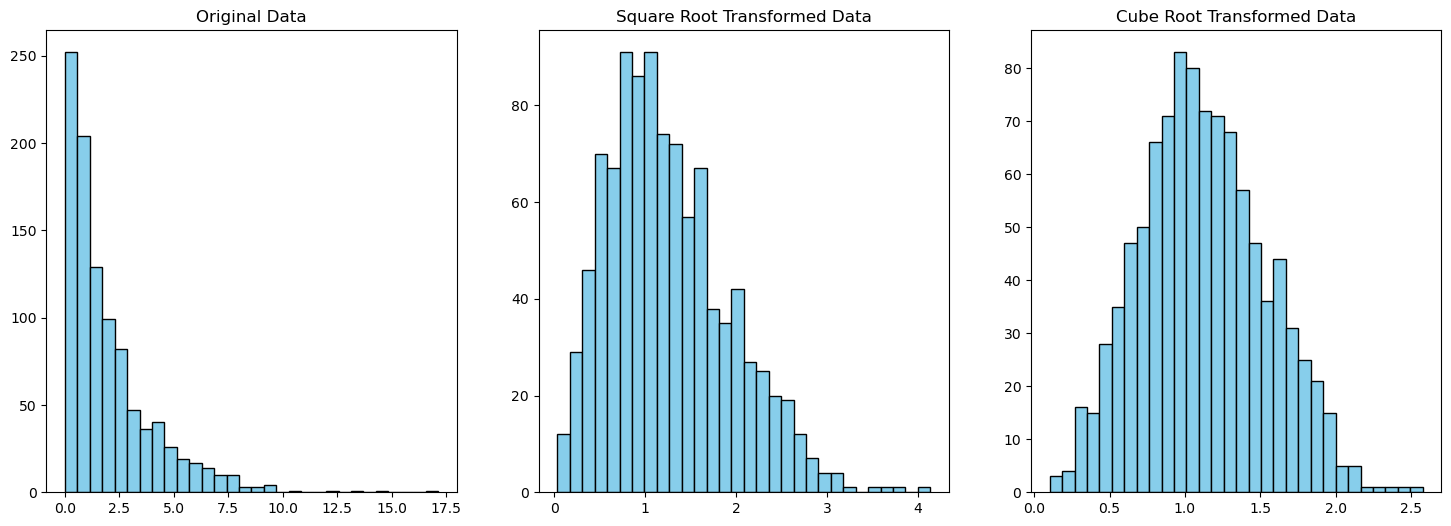

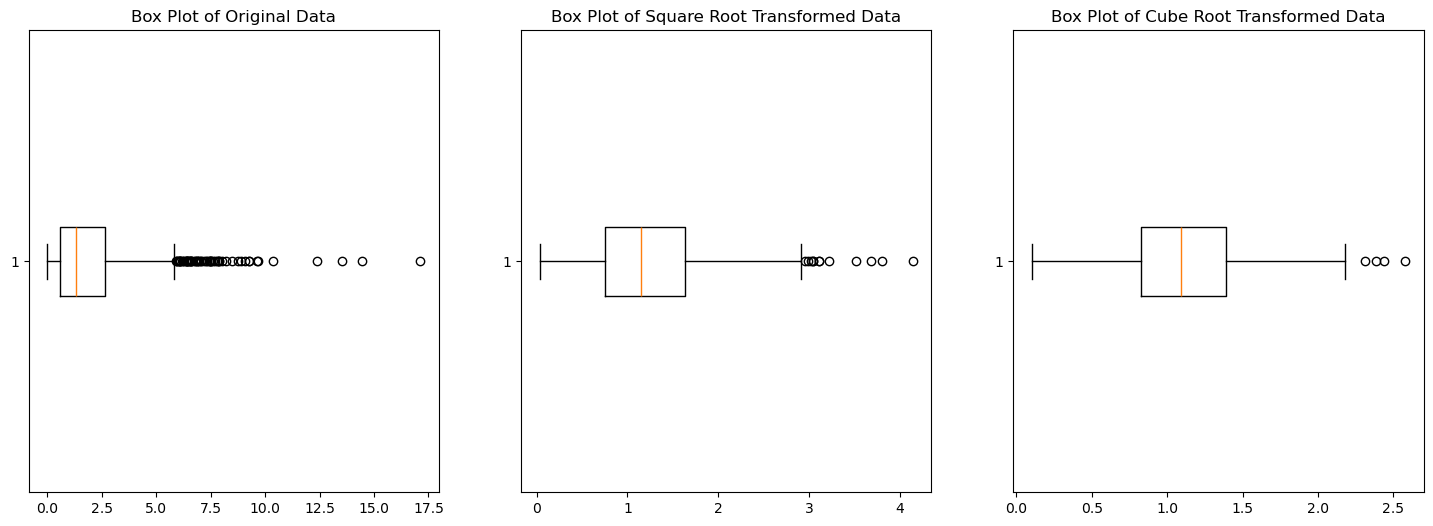

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a skewed dataset
np.random.seed(0)
data = np.random.exponential(scale=2, size=1000)

# Applying square root and cube root transformations
sqrt_data = np.sqrt(data)
cbrt_data = np.cbrt(data)

# Plotting the original and transformed data using histograms
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].hist(data, bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Original Data')
ax[1].hist(sqrt_data, bins=30, color='skyblue', edgecolor='black')
ax[1].set_title('Square Root Transformed Data')
ax[2].hist(cbrt_data, bins=30, color='skyblue', edgecolor='black')
ax[2].set_title('Cube Root Transformed Data')
plt.show()

# Plotting the original and transformed data using box plots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].boxplot(data, vert=False)
ax[0].set_title('Box Plot of Original Data')
ax[1].boxplot(sqrt_data, vert=False)
ax[1].set_title('Box Plot of Square Root Transformed Data')
ax[2].boxplot(cbrt_data, vert=False)
ax[2].set_title('Box Plot of Cube Root Transformed Data')
plt.show()

# Box-Cox Transformation

## Mathematical Explanation:
The Box-Cox transformation is a family of power transformations indexed by a parameter $ \lambda $. It is used to stabilize variance and make the data more normally distributed.

The Box-Cox transformation is defined as:
$ y(\lambda) = \begin{cases} 
\frac{x^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\
\log(x) & \text{if } \lambda = 0 
\end{cases} $

### Implementation in Python:
We use `scipy`'s `boxcox` function to apply the transformation.

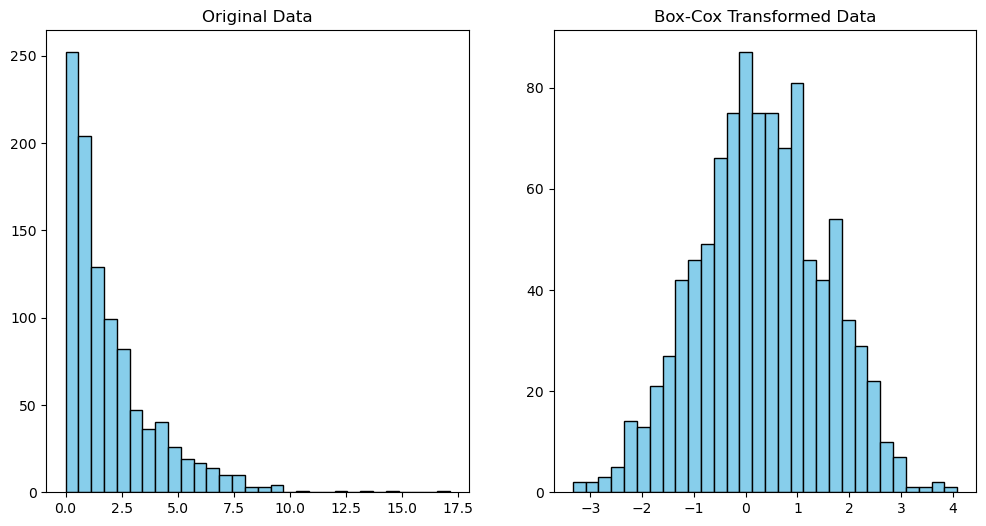

Optimal λ for Box-Cox Transformation: 0.24200946962391828


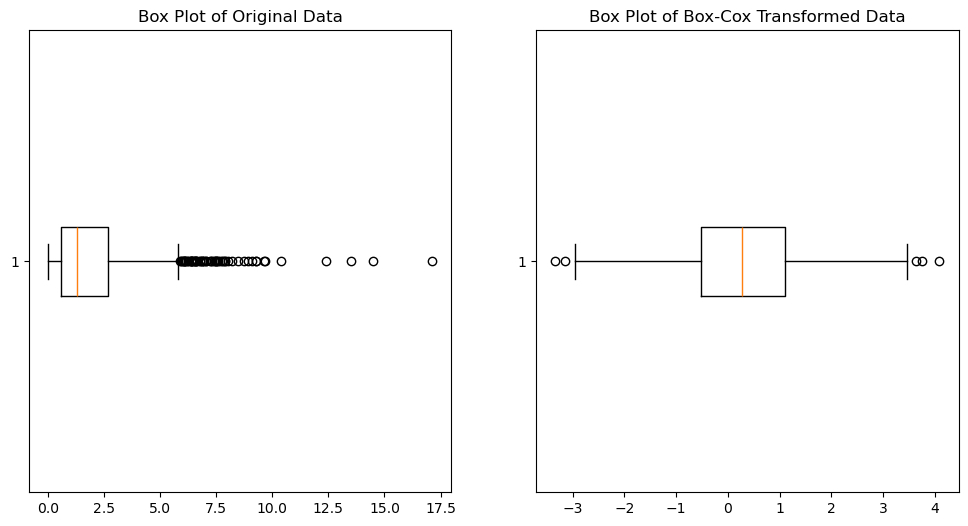

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Generating a skewed dataset
np.random.seed(0)
data = np.random.exponential(scale=2, size=1000)

# Applying Box-Cox transformation
# Note: Box-Cox requires all positive data, so we shift the data by a small value if necessary.
shifted_data = data + 1e-6
boxcox_data, lam = boxcox(shifted_data)

# Plotting the original and transformed data using histograms
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(data, bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Original Data')
ax[1].hist(boxcox_data, bins=30, color='skyblue', edgecolor='black')
ax[1].set_title('Box-Cox Transformed Data')
plt.show()

print(f'Optimal λ for Box-Cox Transformation: {lam}')

# Plotting the original and transformed data using box plots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(data, vert=False)
ax[0].set_title('Box Plot of Original Data')
ax[1].boxplot(boxcox_data, vert=False)
ax[1].set_title('Box Plot of Box-Cox Transformed Data')
plt.show()

Each transformation technique has its own use case and benefits:
- **Log Transformation**: Effective for reducing skewness and handling extreme values.
- **Square Root/Cube Root Transformation**: Less aggressive than log, good for moderate skewness.
- **Box-Cox Transformation**: Provides a flexible approach to stabilize variance and normalize data.
By applying these transformations, we can often improve the performance of statistical models and the interpretability of the data.

# Tree-based Methods that Handle Outliers

### Explanation
Tree-based methods, such as Decision Trees, Random Forests, and Gradient Boosting Trees, are often robust to outliers because they split the data based on feature thresholds. These splits are less influenced by extreme values compared to methods that rely on averaging, such as linear regression.

### Mathematical Concept
- **Decision Trees**: Split the data at each node based on a feature threshold to minimize impurity (e.g., Gini impurity or entropy for classification, mean squared error for regression).
- **Random Forests**: Ensemble of decision trees trained on random subsets of the data and features, reducing variance and increasing robustness.
- **Gradient Boosting Trees**: Ensemble method that builds trees sequentially, where each tree tries to correct the errors of the previous one.

### Code and Plot

Let's use Python to demonstrate how a decision tree and a random forest handle outliers.

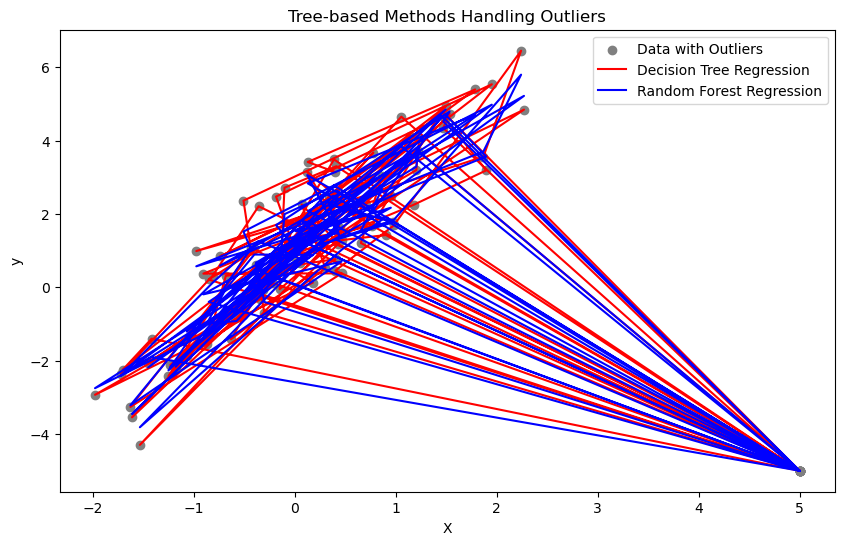

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Generate synthetic data with outliers
np.random.seed(0)
X = np.random.normal(size=100)
y = 2 * X + 1 + np.random.normal(size=100)
# Add outliers
X[::10] = 5
y[::10] = -5

# Reshape X for sklearn
X = X.reshape(-1, 1)

# Fit Decision Tree regressor
tree = DecisionTreeRegressor()
tree.fit(X, y)
tree_y_pred = tree.predict(X)

# Fit Random Forest regressor
forest = RandomForestRegressor(n_estimators=100)
forest.fit(X, y)
forest_y_pred = forest.predict(X)

# Plot data and regression lines
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', marker='o', label='Data with Outliers')
plt.plot(X, tree_y_pred, color='red', label='Decision Tree Regression')
plt.plot(X, forest_y_pred, color='blue', label='Random Forest Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Tree-based Methods Handling Outliers')
plt.legend()
plt.show()

# Regularization Techniques

## Explanation
Regularization techniques add a penalty to the model complexity, which helps to reduce the effect of outliers by shrinking the coefficients of less important features. L1 (Lasso) and L2 (Ridge) regularizations are commonly used.

- **L1 Regularization (Lasso)**: Adds the absolute value of the coefficients to the loss function. It can shrink some coefficients to zero, effectively performing feature selection.
- **L2 Regularization (Ridge)**: Adds the squared value of the coefficients to the loss function. It shrinks coefficients towards zero but does not set any coefficients exactly to zero.

### Mathematical Formulas
- **L1 Regularization (Lasso)**: 
$$ \text{Loss} = \text{RSS} + \lambda \sum_{j} |\beta_j| $$
- **L2 Regularization (Ridge)**: 
$$ \text{Loss} = \text{RSS} + \lambda \sum_{j} \beta_j^2 $$

Where:
- $\text{RSS}$ is the residual sum of squares.
- $\lambda$ is the regularization parameter.
- $\beta_j$ are the model coefficients.

### Code and Plot
Let's use Python to demonstrate how Lasso and Ridge regression handle outliers.


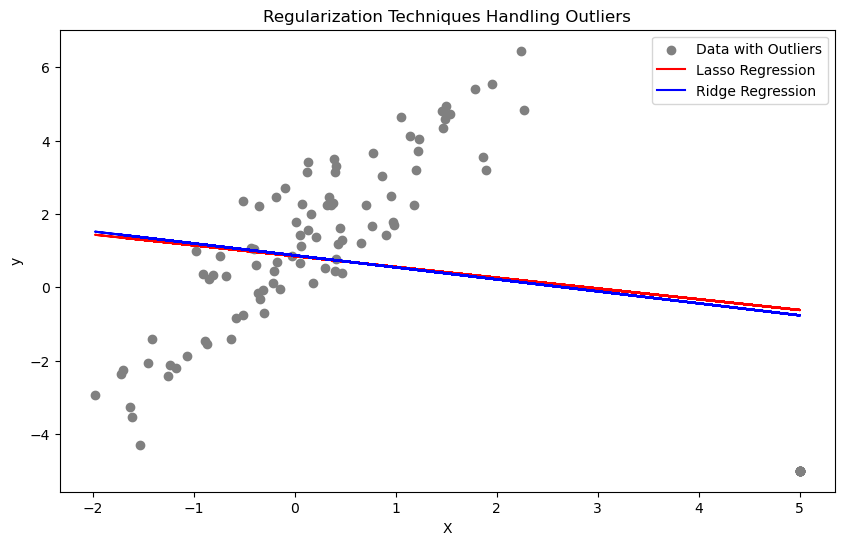

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge

# Generate synthetic data with outliers
np.random.seed(0)
X = np.random.normal(size=100)
y = 2 * X + 1 + np.random.normal(size=100)
# Add outliers
X[::10] = 5
y[::10] = -5

# Reshape X for sklearn
X = X.reshape(-1, 1)

# Fit Lasso regressor
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
lasso_y_pred = lasso.predict(X)

# Fit Ridge regressor
ridge = Ridge(alpha=0.1)
ridge.fit(X, y)
ridge_y_pred = ridge.predict(X)

# Plot data and regression lines
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', marker='o', label='Data with Outliers')
plt.plot(X, lasso_y_pred, color='red', label='Lasso Regression')
plt.plot(X, ridge_y_pred, color='blue', label='Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regularization Techniques Handling Outliers')
plt.legend()
plt.show()

# Weighting Data Points

## Explanation
In some cases, instead of removing outliers, we can assign lower weights to outliers during analysis or model fitting to reduce their influence. This approach is known as weighted analysis. The key idea is to give more importance to the "typical" data points and less to the outliers.

### Mathematical Concept
Weighted regression can be formulated as follows:

- **Weighted Least Squares Regression**: 
$$ \text{Loss} = \sum_{i} w_i (y_i - \hat{y}_i)^2 $$

Where:
- $ w_i $ is the weight assigned to the $ i $-th data point.
- $ y_i $ is the observed value.
- $ \hat{y}_i $ is the predicted value.

The weights $ w_i $ are chosen such that they are smaller for outliers and larger for typical data points. One common approach is to use the inverse of the squared residuals from an initial fit to determine the weights.

### Code and Plot
Let's use Python to demonstrate how weighted least squares regression can handle outliers.

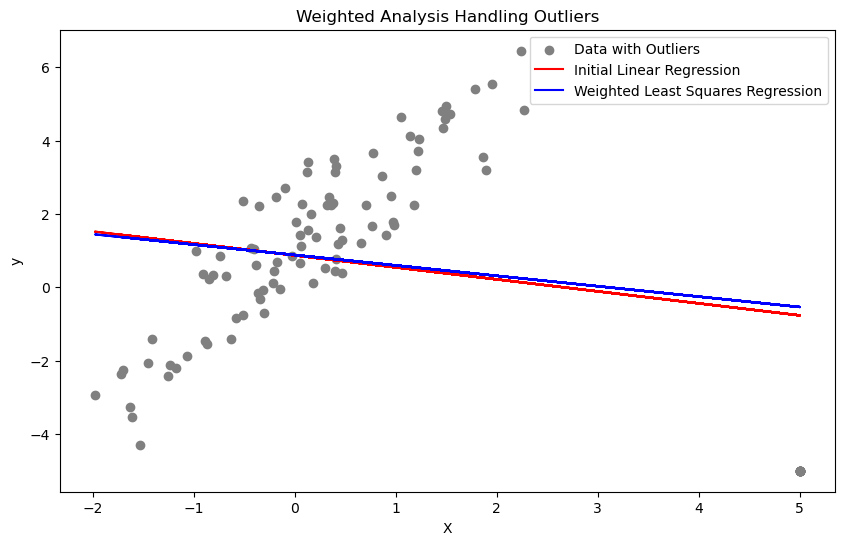

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import WLS

# Generate synthetic data with outliers
np.random.seed(0)
X = np.random.normal(size=100)
y = 2 * X + 1 + np.random.normal(size=100)
# Add outliers
X[::10] = 5
y[::10] = -5

# Reshape X for sklearn
X = X.reshape(-1, 1)

# Initial linear regression to find residuals
initial_model = LinearRegression()
initial_model.fit(X, y)
initial_y_pred = initial_model.predict(X)

# Calculate residuals
residuals = np.abs(y - initial_y_pred)

# Assign weights: inverse of the squared residuals
weights = 1 / (residuals ** 2)

# Fit weighted least squares regression
X_with_intercept = np.hstack([np.ones_like(X), X])  # Add intercept term
wls_model = WLS(y, X_with_intercept, weights=weights)
wls_results = wls_model.fit()
wls_y_pred = wls_results.predict(X_with_intercept)

# Plot data and regression lines
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', marker='o', label='Data with Outliers')
plt.plot(X, initial_y_pred, color='red', label='Initial Linear Regression')
plt.plot(X, wls_y_pred, color='blue', label='Weighted Least Squares Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Weighted Analysis Handling Outliers')
plt.legend()
plt.show()


# Capping or Trimming

## 1. Winsorizing
Winsorizing involves limiting extreme values in the data by setting a predefined percentile as the threshold and capping the outliers to this threshold.

### Mathematical Explanation:
If we choose the 5th and 95th percentiles as thresholds, any value below the 5th percentile will be set to the 5th percentile value, and any value above the 95th percentile will be set to the 95th percentile value.

Mathematically, for a data point $ x_i $:
$$ 
x_i = \begin{cases} 
Q_5 & \text{if } x_i < Q_5 \\
Q_{95} & \text{if } x_i > Q_{95} \\
x_i & \text{otherwise}
\end{cases} 
$$
where $ Q_5 $ is the 5th percentile and $ Q_{95} $ is the 95th percentile.

### Implementation in Python:

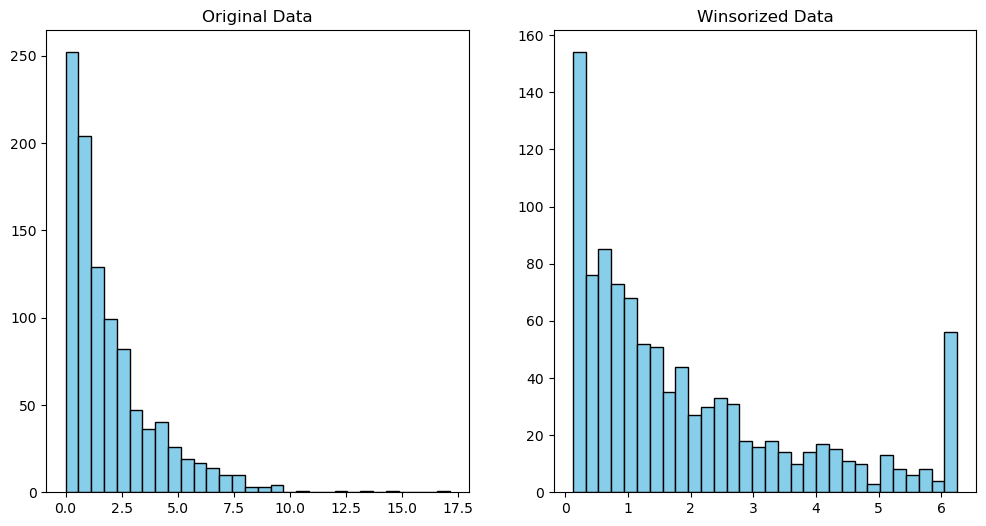

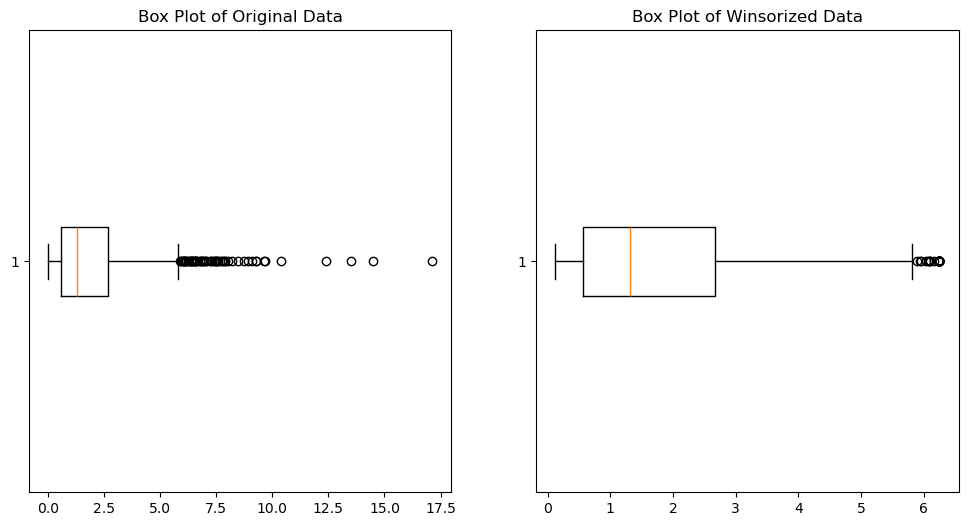

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mstats

# Generating a skewed dataset
np.random.seed(0)
data = np.random.exponential(scale=2, size=1000)

# Applying Winsorizing
winsorized_data = mstats.winsorize(data, limits=[0.05, 0.05])

# Plotting the original and winsorized data
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(data, bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Original Data')
ax[1].hist(winsorized_data, bins=30, color='skyblue', edgecolor='black')
ax[1].set_title('Winsorized Data')

plt.show()

# Plotting the original and winsorized data using box plots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(data, vert=False)
ax[0].set_title('Box Plot of Original Data')
ax[1].boxplot(winsorized_data, vert=False)
ax[1].set_title('Box Plot of Winsorized Data')
plt.show()

## 2. Clipping
Clipping replaces values beyond a specified threshold with the threshold value itself.

### Mathematical Explanation:
For a given lower threshold $ L $ and upper threshold $ U $, the clipping transformation is:

$$ 
x_i = \begin{cases} 
L & \text{if } x_i < L \\
U & \text{if } x_i > U \\
x_i & \text{otherwise}
\end{cases} 
$$

### Implementation in Python:

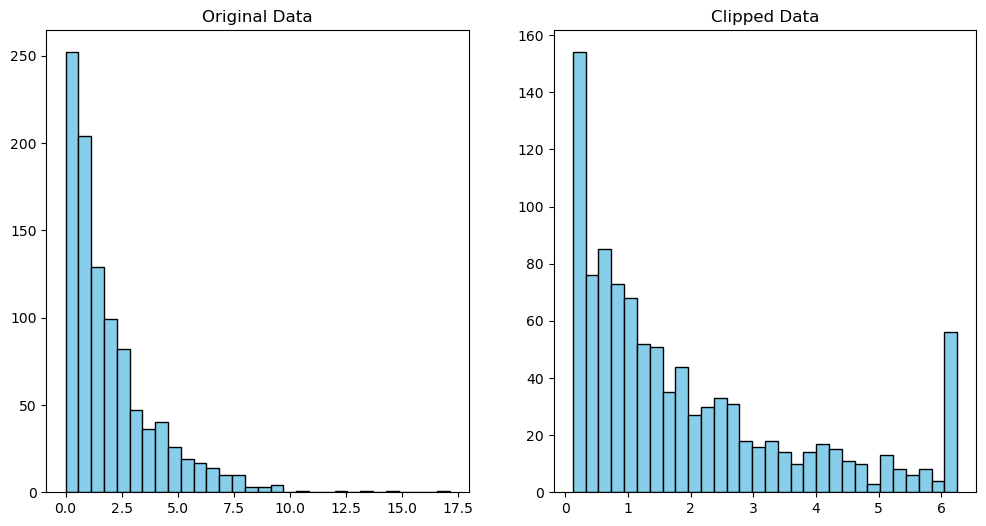

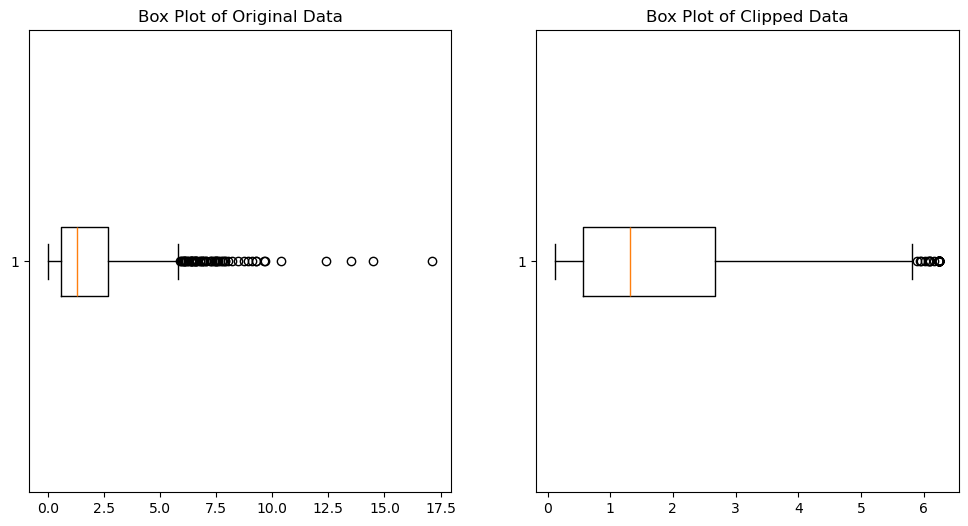

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a skewed dataset
np.random.seed(0)
data = np.random.exponential(scale=2, size=1000)

# Defining thresholds
lower_threshold = np.percentile(data, 5)
upper_threshold = np.percentile(data, 95)

# Applying clipping
clipped_data = np.clip(data, lower_threshold, upper_threshold)

# Plotting the original and clipped data
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(data, bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Original Data')
ax[1].hist(clipped_data, bins=30, color='skyblue', edgecolor='black')
ax[1].set_title('Clipped Data')

plt.show()

# Plotting the original and clipped data using box plots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(data, vert=False)
ax[0].set_title('Box Plot of Original Data')
ax[1].boxplot(clipped_data, vert=False)
ax[1].set_title('Box Plot of Clipped Data')
plt.show()

# Data Imputation

## Explanation
Data imputation involves replacing missing or outlier values with estimated values based on the distribution of the rest of the data. When dealing specifically with outliers, one approach is to replace them with imputed values to better represent the overall data distribution.

### Mathematical Concept
- **Replace Outliers with Imputed Values**:
  - Identify outliers using a chosen method (e.g., Z-score, IQR).
  - Replace outliers with imputed values based on the distribution of the remaining data.
  - One common approach is to replace outliers with the mean, median, or mode of the non-outlier data.

### Code and Plot
Let's use Python to demonstrate how data imputation can be applied by replacing outliers with imputed values based on the mean of the non-outlier data.

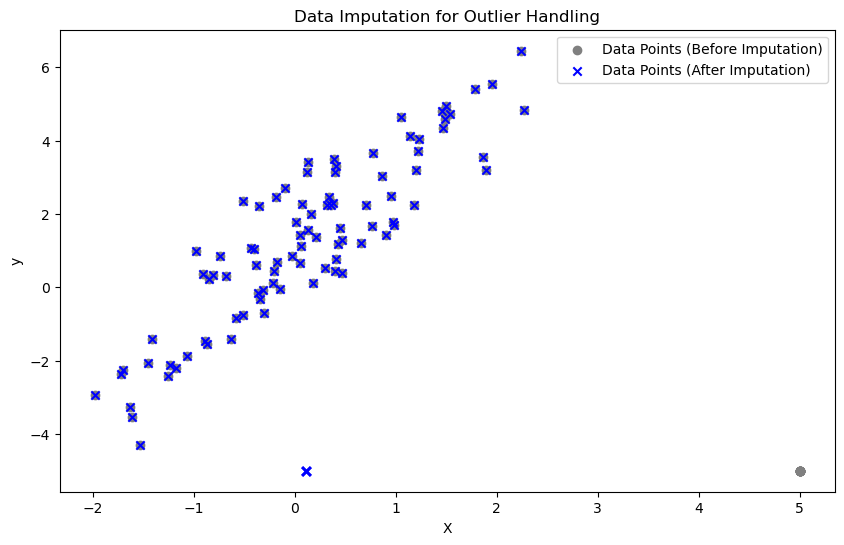

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with outliers
np.random.seed(0)
X = np.random.normal(size=100)
y = 2 * X + 1 + np.random.normal(size=100)
# Add outliers
X[::10] = 5
y[::10] = -5

# Identify outliers using IQR
Q1 = np.percentile(X, 25)
Q3 = np.percentile(X, 75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR

outliers_mask = (X < outlier_threshold_low) | (X > outlier_threshold_high)

# Replace outliers with imputed values based on mean of non-outlier data
X_imputed = X.copy()
X_imputed[outliers_mask] = np.mean(X[~outliers_mask])

# Plot data before and after imputation
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', marker='o', label='Data Points (Before Imputation)')
plt.scatter(X_imputed, y, color='blue', marker='x', label='Data Points (After Imputation)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data Imputation for Outlier Handling')
plt.legend()
plt.show()

# Robust Scaling

## Explanation
Robust scaling is a technique used to scale features using statistics that are robust to outliers. Unlike standard scaling methods, which use mean and standard deviation, robust scaling utilizes statistics like the median and interquartile range (IQR), which are less affected by outliers. One common implementation of robust scaling is the Robust Scaler available in libraries like scikit-learn.

### Mathematical Concept
- **Robust Scaler**:
  - Scale features using the median and IQR:
    $$ X_{\text{scaled}} = \frac{X - \text{median}(X)}{\text{IQR}(X)} $$
  - Where:
    - $ X $ is the original feature.
    - $ \text{median}(X) $ is the median of the feature.
    - $ \text{IQR}(X) $ is the interquartile range of the feature.

### Code and Plot
Let's use Python to demonstrate how the Robust Scaler can be applied to scale features robustly, mitigating the influence of outliers.


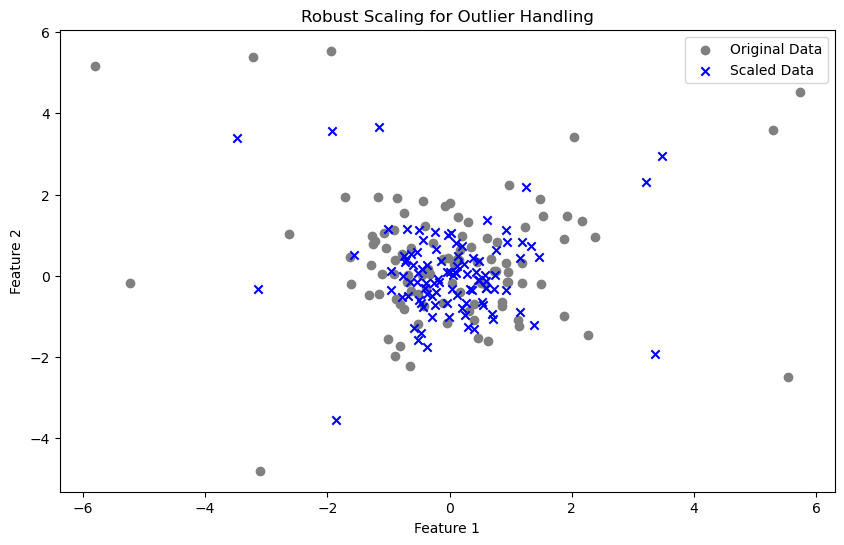

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# Generate synthetic data with outliers
np.random.seed(0)
X = np.random.normal(size=(100, 2))
# Add outliers
X[::10] = np.random.uniform(low=-6, high=6, size=(10, 2))

# Apply Robust Scaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Plot original and scaled data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], color='gray', marker='o', label='Original Data')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], color='blue', marker='x', label='Scaled Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Robust Scaling for Outlier Handling')
plt.legend()
plt.show()

# Median and IQR

## Explanation
Outliers can significantly skew the mean and standard deviation, making them unreliable measures of central tendency and spread. Instead, the median and IQR provide more robust alternatives.

- **Median**: The median is the middle value of a data set when it is ordered. For an odd number of observations, it is the central value. For an even number of observations, it is the average of the two central values.
- **IQR**: The interquartile range is the range between the first quartile (Q1, 25th percentile) and the third quartile (Q3, 75th percentile). It measures the spread of the middle 50% of the data.

### Mathematical Formulas
- **Median**: $ \text{Median}(X) $
- **IQR**: $ \text{IQR}(X) = Q3 - Q1 $

### Code and Plot
Let's use Python to calculate the median and IQR and visualize the data.

Median: 14.5
Q1 (25th percentile): 13.0
Q3 (75th percentile): 16.75
IQR: 3.75


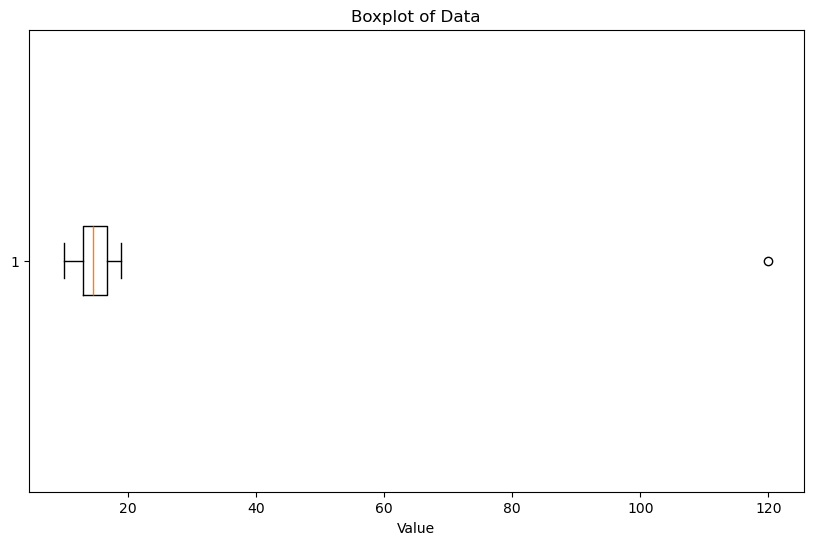

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data with outliers
data = np.array([10, 12, 12, 13, 13, 14, 14, 15, 16, 16, 17, 18, 19, 120])

# Calculate median and IQR
median = np.median(data)
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

print(f"Median: {median}")
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

# Plot data
plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=False)
plt.title('Boxplot of Data')
plt.xlabel('Value')
plt.show()


# Robust Regression

## Explanation
Robust regression methods are designed to be less sensitive to outliers compared to ordinary least squares regression. Two common methods are RANSAC and the Theil-Sen estimator.

- **RANSAC (Random Sample Consensus)**: RANSAC iteratively selects a random subset of the data points, fits a model, and classifies inliers and outliers. The final model is chosen based on the subset with the most inliers.
- **Theil-Sen Estimator**: The Theil-Sen estimator is a non-parametric method that computes the median of all possible slopes between pairs of points. It is more robust than least squares regression, especially with outliers.

### Mathematical Formulas
- **RANSAC**: Fits a model using the largest subset of inliers.
- **Theil-Sen Estimator**: Median of slopes $ \frac{y_j - y_i}{x_j - x_i} $ for all pairs $ (i, j) $.

### Code and Plot
Let's use Python to demonstrate both RANSAC and the Theil-Sen estimator.

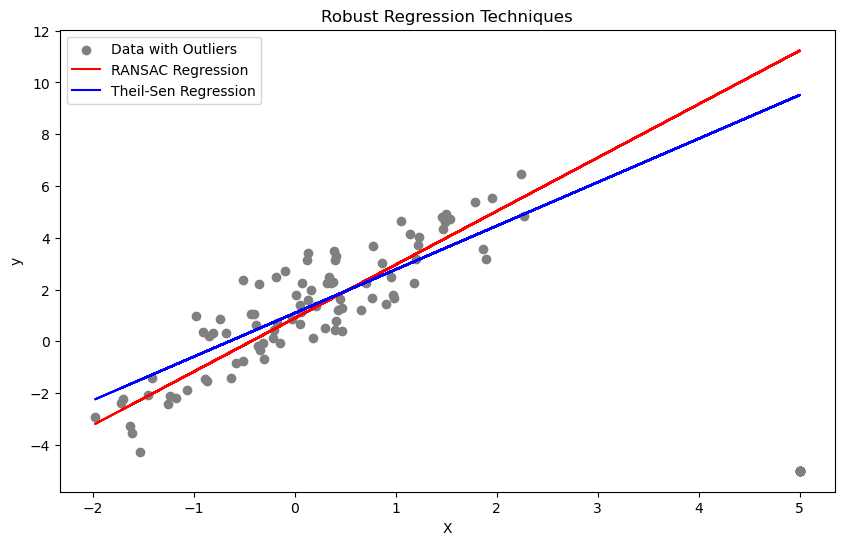

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor, TheilSenRegressor

# Generate synthetic data with outliers
np.random.seed(0)
X = np.random.normal(size=100)
y = 2 * X + 1 + np.random.normal(size=100)
# Add outliers
X[::10] = 5
y[::10] = -5

# Reshape X for sklearn
X = X.reshape(-1, 1)

# Fit RANSAC regressor
ransac = RANSACRegressor()
ransac.fit(X, y)
ransac_y_pred = ransac.predict(X)

# Fit Theil-Sen regressor
theil_sen = TheilSenRegressor()
theil_sen.fit(X, y)
theil_sen_y_pred = theil_sen.predict(X)

# Plot data and regression lines
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', marker='o', label='Data with Outliers')
plt.plot(X, ransac_y_pred, color='red', label='RANSAC Regression')
plt.plot(X, theil_sen_y_pred, color='blue', label='Theil-Sen Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Robust Regression Techniques')
plt.legend()
plt.show()

# Segmentation

## Explanation
Segmentation involves dividing the data into meaningful groups to handle outliers more effectively. This can be achieved through two primary approaches:

1. **Cluster Analysis**: Group similar data points together using clustering algorithms (e.g., K-means) and analyze clusters separately.
2. **Separate Modeling**: Create separate models for outliers and non-outliers if they represent different populations.

## 1. Cluster Analysis

Cluster analysis is a method used to group data points into clusters based on their similarities. By grouping similar data points together, we can isolate outliers into separate clusters and analyze them separately from the main data.

### Mathematical Concept
- **K-means Clustering**: 
  - Objective: Minimize the sum of squared distances between data points and the centroid of their assigned cluster.
  - Formulation: 
  $$ \text{argmin}_{C} \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2 $$
  - Where:
    - $ k $ is the number of clusters.
    - $ C_i $ is the set of points in the $ i $-th cluster.
    - $ \mu_i $ is the centroid of the $ i $-th cluster.
    - $ x $ is a data point.

### Code and Plot

Let's use Python to demonstrate how K-means clustering can be used to handle outliers.

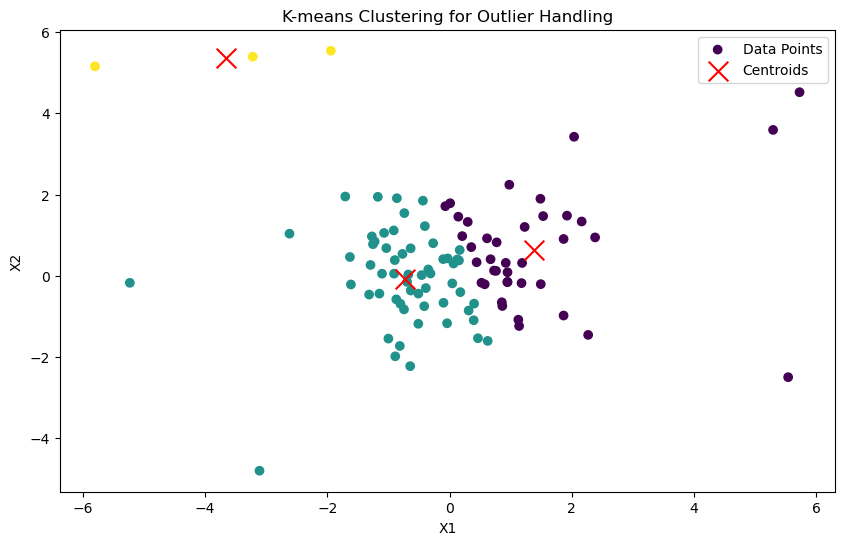

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

# Generate synthetic data with outliers
np.random.seed(0)
X = np.random.normal(size=(100, 2))
# Add outliers
X[::10] = np.random.uniform(low=-6, high=6, size=(10, 2))

# Fit K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot data and cluster centers
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-means Clustering for Outlier Handling')
plt.legend()
plt.show()

## 2. Separate Modeling

### Explanation
When outliers represent different populations, it may be beneficial to create separate models for outliers and non-outliers. This allows each model to be tailored to the specific characteristics of each population.

### Mathematical Concept
- **Separate Modeling**:
  - Identify outliers using a chosen method (e.g., clustering, IQR).
  - Fit separate models for outliers and non-outliers.

### Code and Plot
Let's use Python to demonstrate how separate modeling can be applied by identifying outliers using IQR and fitting separate linear regression models for outliers and non-outliers.


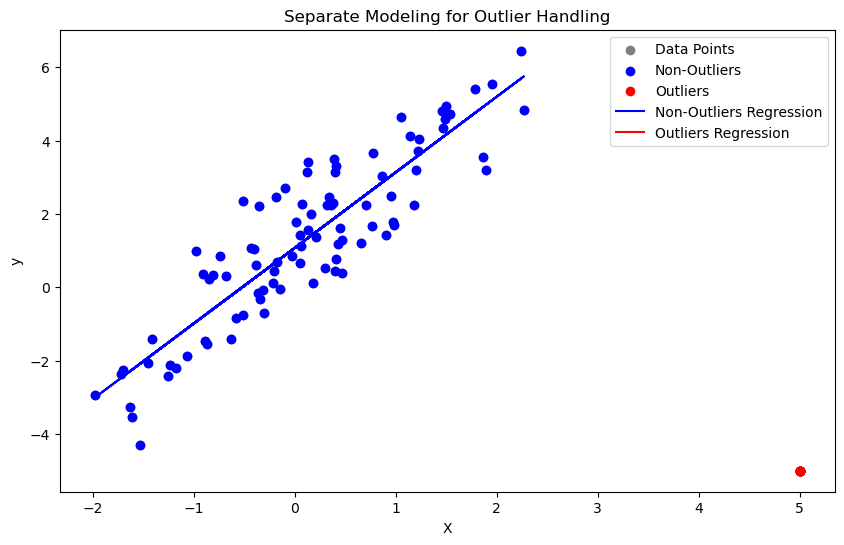

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data with outliers
np.random.seed(0)
X = np.random.normal(size=100)
y = 2 * X + 1 + np.random.normal(size=100)
# Add outliers
X[::10] = 5
y[::10] = -5

# Identify outliers using IQR
Q1 = np.percentile(X, 25)
Q3 = np.percentile(X, 75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR

non_outliers_mask = (X >= outlier_threshold_low) & (X <= outlier_threshold_high)
outliers_mask = ~non_outliers_mask

X_non_outliers = X[non_outliers_mask].reshape(-1, 1)
y_non_outliers = y[non_outliers_mask]
X_outliers = X[outliers_mask].reshape(-1, 1)
y_outliers = y[outliers_mask]

# Fit separate linear regression models
model_non_outliers = LinearRegression()
model_non_outliers.fit(X_non_outliers, y_non_outliers)
non_outliers_y_pred = model_non_outliers.predict(X_non_outliers)

model_outliers = LinearRegression()
model_outliers.fit(X_outliers, y_outliers)
outliers_y_pred = model_outliers.predict(X_outliers)

# Plot data and regression lines
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', marker='o', label='Data Points')
plt.scatter(X_non_outliers, y_non_outliers, color='blue', marker='o', label='Non-Outliers')
plt.scatter(X_outliers, y_outliers, color='red', marker='o', label='Outliers')
plt.plot(X_non_outliers, non_outliers_y_pred, color='blue', label='Non-Outliers Regression')
plt.plot(X_outliers, outliers_y_pred, color='red', label='Outliers Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Separate Modeling for Outlier Handling')
plt.legend()
plt.show()
